<a href="https://colab.research.google.com/github/Alisonia/Airline-review-analysis/blob/main/customerAirlineReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **CUSTOMERS’ BEHAVIOUR AND THEIR PREFERENCES OBTAINED THROUGH THE AIRLINE HOLIDAY BOOKING SYSTEM**

In [ ]:
#loading the required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [ ]:
#loading the data into colab environment
from google.colab import files
uploaded = files.upload()

Saving Airline_Review.csv to Airline_Review (1).csv


In [ ]:
#loading the file into panda
import io
df = pd.read_csv(io.BytesIO(uploaded['Airline_Review (1).csv']))
df.head()
#print(uploaded.keys())

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class
2,E Lanewoski,Heathrow to Bodrum,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class
4,R Vines,London City to Ibiza,Business Class,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure


In [ ]:
# size of the data
df.shape

(3580, 9)

In [ ]:
#datatype
df.dtypes

Passanger_Name            object
Flying_month      datetime64[ns]
Route                     object
Rating                   float64
Verified                  object
Review_title              object
Review_content            object
Traveller_type            object
Class                     object
dtype: object

In [ ]:
#checking missing items
df.isnull().sum()

Passanger_Name       0
Flying_month       765
Route              764
Rating               5
Verified          2310
Review_title         0
Review_content       0
Traveller_type       0
Class                1
dtype: int64

In [ ]:
#dropping missing items except in Verified column
columns_to_dropna = ['Flying_month', 'Route', 'Rating', 'Class']
df.dropna(subset=columns_to_dropna, inplace=True)
df.isnull().sum()

Passanger_Name       0
Flying_month         0
Route                0
Rating               0
Verified          1545
Review_title         0
Review_content       0
Traveller_type       0
Class                0
dtype: int64

In [ ]:
#filling variables verified.
df['Verified'].fillna('Not Verified', inplace=True)
df.drop_duplicates(keep='first', inplace=True)
df.shape

(2813, 9)

In [ ]:
# export df to csv to examine the inconsistency in the data
df.to_csv('df.csv', index=False)

In [ ]:
#loading the data into colab environment
from google.colab import files
uploaded = files.upload()

Saving dfcleaned.csv to dfcleaned.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['dfcleaned.csv']))
df = df2
df.head()

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
0,Paige Boet,23-Jun,New Orleans to London,1,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class
1,S Layne,23-Mar,London to Amman,1,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class
2,Joel Burman,23-Jun,Amman to London,4,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class
3,M King,23-Jun,London to Washington,1,Trip Verified,Communication is terrible,Absolutely horrible airline. Communication is ...,Couple Leisure,Economy Class
4,Carol Willmore,23-Jun,London to Funchal,1,Not Verified,flight failed at every level,This flight failed at every level. We were del...,Couple Leisure,Economy Class


In [ ]:
df.shape

(947, 9)

In [ ]:
# Convert 'Flying_month' to datetime format
df['Flying_month'] = pd.to_datetime(df['Flying_month'], format='%d-%b', errors='coerce')

# Extract month from the datetime column
df['Month'] = df['Flying_month'].dt.month_name()

df.head()

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Month
0,Paige Boet,1900-06-23,New Orleans to London,1,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,June
1,S Layne,1900-03-23,London to Amman,1,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,March
2,Joel Burman,1900-06-23,Amman to London,4,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,June
3,M King,1900-06-23,London to Washington,1,Trip Verified,Communication is terrible,Absolutely horrible airline. Communication is ...,Couple Leisure,Economy Class,June
4,Carol Willmore,1900-06-23,London to Funchal,1,Not Verified,flight failed at every level,This flight failed at every level. We were del...,Couple Leisure,Economy Class,June


#### **Descriptive Analysis**

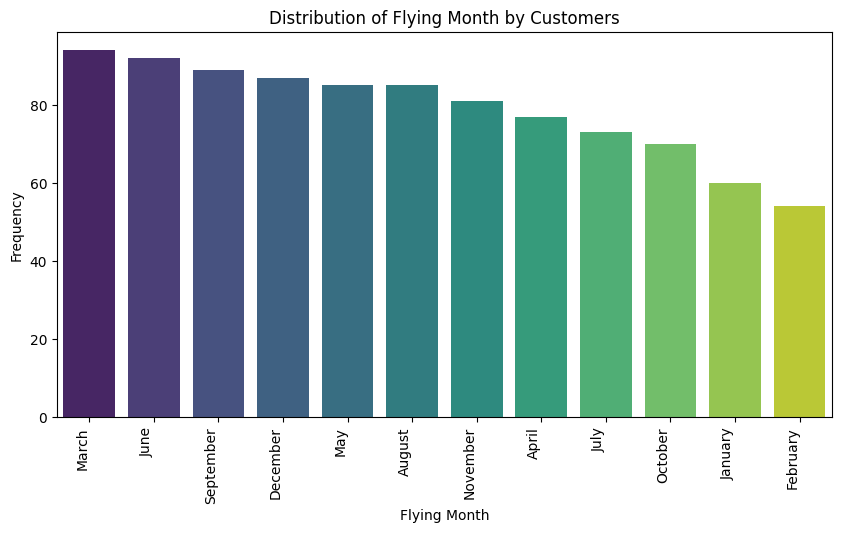

In [ ]:
# Set up the plot
plt.figure(figsize=(10, 5))

# Flying_month (Bar Chart)
sns.countplot(data=df, x='Month', order=df['Month'].value_counts().index, palette='viridis')
plt.title('Distribution of Flying Month by Customers')
plt.xlabel('Flying Month')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability

plt.show()


In [ ]:
# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.4, hspace=1.0)  # Adjust the space between subplots

# Class
df['Class'].value_counts().plot(kind='bar', ax=axes[0, 0], color='salmon')
axes[0, 0].set_title('Frequency Distribution of Class')
axes[0, 0].set_xlabel('Class')
axes[0, 0].set_ylabel('Count')

# Traveller_type
df['Traveller_type'].value_counts().plot(kind='pie', ax=axes[0, 1], autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Proportional Distribution of Traveller Types')

# Rating
sns.histplot(data=df, x='Rating', bins=10, kde=True, ax=axes[1, 0], color='blue', edgecolor='white')
axes[1, 0].set_title('Distribution of Ratings')
axes[1, 0].set_xlabel('Rating')
axes[1, 0].set_ylabel('Frequency')

# Verified
df['Verified'].value_counts().plot(kind='bar', ax=axes[1, 1], color='green')
axes[1, 1].set_title('Frequency Distribution of Verification Status')
axes[1, 1].set_xlabel('Verification Status')
axes[1, 1].set_ylabel('Count')

plt.show()


In [ ]:
from wordcloud import WordCloud

# Word Cloud for Routes
wordcloud_title = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Route']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis('off')
plt.title("Thematic Analysis: Customers' Route")
plt.show()

# Word Cloud for Review Title
wordcloud_title = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Review_title']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis('off')
plt.title('Thematic Analysis: Review Title')
plt.show()

# Word Cloud for Review Content
wordcloud_content = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Review_content']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_content, interpolation='bilinear')
plt.axis('off')
plt.title('hematic Analysis: Review Content')
plt.show()

#### **Research question**

##### Flying month vs customer behaviour rating

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA
model = ols('Rating ~ Month', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display ANOVA table
#print(anova_table)

               sum_sq     df         F    PR(>F)
Month       60.727106   11.0  0.718088  0.721915
Residual  7188.263390  935.0       NaN       NaN


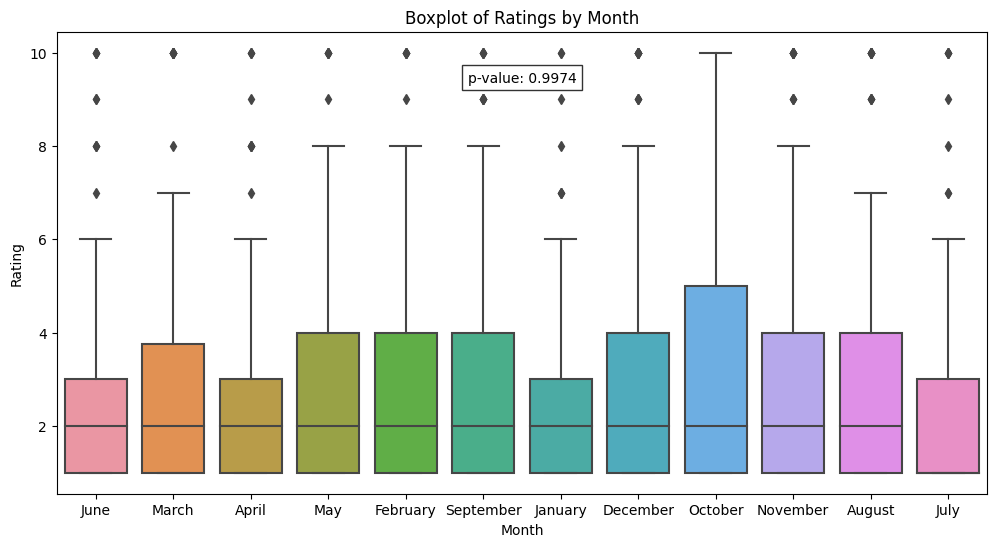

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD post hoc test
tukey_results = pairwise_tukeyhsd(df['Rating'], df['Month'])

# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Rating', data=df)
plt.title('Boxplot of Ratings by Month')

# Annotate with p-value
p_value = tukey_results.pvalues[1]
plt.text(0.5, 0.9, f'p-value: {p_value:.4f}', transform=plt.gca().transAxes, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8))

plt.show()

##### Factor affecting succesful booking: classification model

In [ ]:
# Define the threshold for successful rating
threshold_rating = 5

# Create the Booking_Status indicator
df['Booking_Status'] = (df['Rating'] >= threshold_rating) & (df['Verified'] == 'Trip Verified')
df['Booking_Status'] = df['Booking_Status'].astype(int)

# Display the modified DataFrame
print(df[['Rating', 'Verified', 'Booking_Status']])


     Rating       Verified  Booking_Status
0         1  Trip Verified               0
1         1  Trip Verified               0
2         4   Not Verified               0
3         1  Trip Verified               0
4         1   Not Verified               0
..      ...            ...             ...
942       4   Not Verified               0
943       8   Not Verified               0
944       6   Not Verified               0
945      10   Not Verified               0
946       9   Not Verified               0

[947 rows x 3 columns]


In [ ]:
#Getting variables for predictive modeling
# Specify the columns you want to include in the new DataFrame
selected_columns = ['Booking_Status', 'Rating', 'Verified', 'Traveller_type', 'Class']

# Create the new DataFrame df_model
df_model = df[selected_columns].copy()

# Display the new DataFrame
df_model.head()


,Booking_Status,Rating,Verified,Traveller_type,Class
0,0,1,Trip Verified,Solo Leisure,Economy Class
1,0,1,Trip Verified,Couple Leisure,Business Class
2,0,4,Not Verified,Solo Leisure,Economy Class
3,0,1,Trip Verified,Couple Leisure,Economy Class
4,0,1,Not Verified,Couple Leisure,Economy Class


In [ ]:
#convert categorical variable to dummies
df_model = pd.get_dummies(df_model, drop_first=False)
df_model.head()

,Booking_Status,Rating,Verified_Trip Verified,Traveller_type_Couple Leisure,Traveller_type_Family Leisure,Traveller_type_Solo Leisure,Class_Economy Class,Class_First Class,Class_Premium Economy
0,0,1,1,0,0,1,1,0,0
1,0,1,1,1,0,0,0,0,0
2,0,4,0,0,0,1,1,0,0
3,0,1,1,1,0,0,1,0,0
4,0,1,0,1,0,0,1,0,0


Text(0.5, 1.0, "Correlation of Features with Customers' Booking Status")

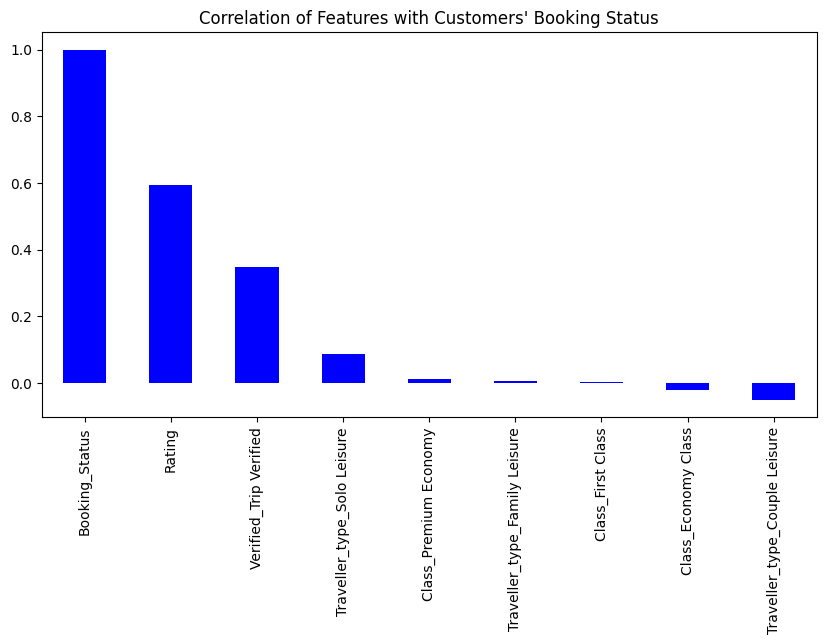

In [ ]:
plt.figure(figsize=(10,5))
df_model.corr()['Booking_Status'].sort_values(ascending = False).plot(kind='bar',color="blue")
plt.title("Correlation of Features with Customers' Booking Status")

<Axes: >

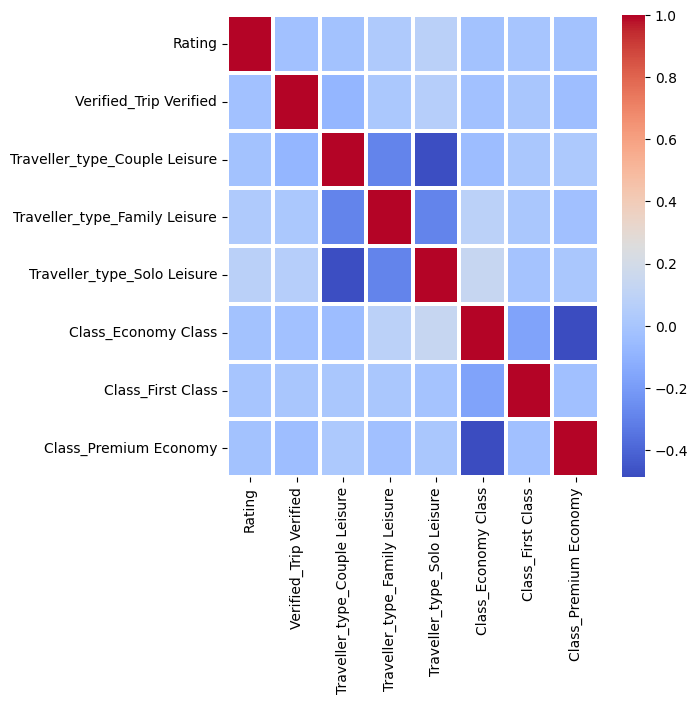

In [ ]:
#checking multicollinearity
df_corr = df_model.drop('Booking_Status', axis=1).corr()
plt.figure(figsize=(6,6))
sns.heatmap(df_corr, annot=False, cmap="coolwarm", linecolor="white", linewidth=1.5)

In [ ]:
#Getting the features(i.e. X) and target (i.e. y)values
X = df_model.drop('Booking_Status', axis=1)
y = df_model["Booking_Status"]

#Scaling the X features
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
X.head()

,Rating,Verified_Trip Verified,Traveller_type_Couple Leisure,Traveller_type_Family Leisure,Traveller_type_Solo Leisure,Class_Economy Class,Class_First Class,Class_Premium Economy
0,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.333333,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#splitting X features into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

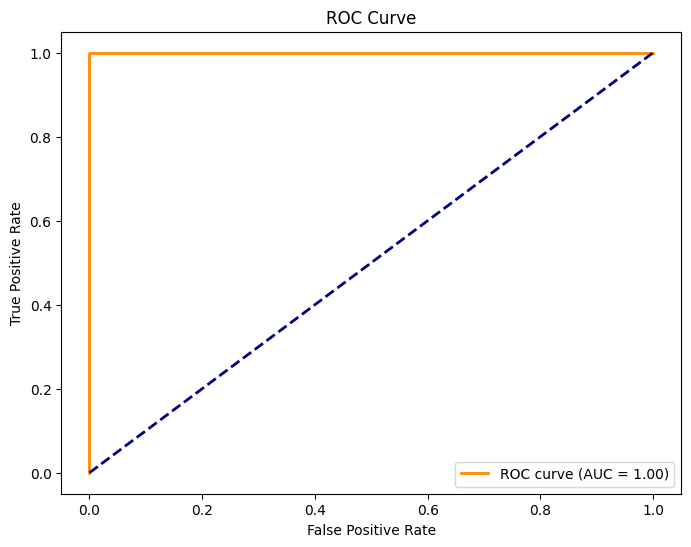

In [ ]:
# Train a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict probabilities on the test set
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

<Axes: >

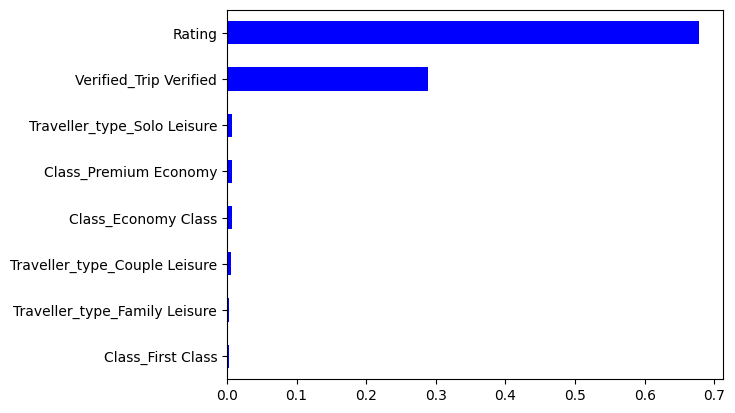

In [ ]:
# Display feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh',color='blue')